# Create First Image Classifier using kNN (K Nearest Neighbor)

This algorithm is not actually learn, instead it only use euclidean distances and choose the nearest eucledian distances among the class. The largest downside is also the model need to save all the images to compare, so it would have a really big model and of course computationally expensive.

## Import the Necessary Packages

In [7]:
# Import the necessary packages

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import numpy as np
import cv2
import os

## Preprocessing

In [8]:
class SimpleProcessor:
    def __init__(self,width,height,inter=cv2.INTER_AREA):
        self.width=width
        self.height=height
        self.inter=inter
        
    def preprocess(self,image):
        #Resize image ignoring aspect ratio
        return cv2.resize(image,(self.width,self.height),interpolation=self.inter)
        

## Building Image Loader

In [9]:
class SimpleDatasetLoader:
    def __init__(self,preprocessors=None):
        self.preprocessors=preprocessors
        
        if self.preprocessors is None:
            self.preprocessors=[]
            
    def load(self,imagePaths,verbose=1):
        data=[]
        labels=[]
        
        #Loop over the input images
        for (i,imagePath) in enumerate(imagePaths):
            # load the image and extract the class label assuming
            # that our path has the following format:
            # /path/to/dataset/{class}/{image}.jpg
            image=cv2.imread(imagePath)
            label=imagePath.split(os.path.sep)[-2]
            
            if self.preprocessors is not None:
                #loop over the preprocessors to each image
                
                for p in self.preprocessors:
                    image=p.preprocess(image)
                    
            # treat our processed image as a "feature vector"
            # by updating the data list followed by the labels         
            data.append(image)
            labels.append(label)
            
            # show an update every `verbose` images
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1,len(imagePaths)))
                
        return (np.array(data),np.array(labels))


## Implementing KNN

In [10]:
dataset="Images/dataset/animals"
neighbors=1
jobs=-1

In [11]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset))
                  
sp=SimpleProcessor(32,32)
sdl=SimpleDatasetLoader(preprocessors=[sp])
(data,labels)=sdl.load(imagePaths,verbose=500)
data=data.reshape((data.shape[0],3072)) #3072 is 32x32x3

# show some information on memory consumption of the images
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
[INFO] features matrix: 8.8MB


In [12]:
# Encode the label

le=LabelEncoder()
labels=le.fit_transform(labels)

(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.25,random_state=42)


In [13]:
#Train and evaluate Knn Neigbor

model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=jobs)
model.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
print(classification_report(testY,model.predict(testX),target_names=le.classes_)) 

              precision    recall  f1-score   support

        cats       0.41      0.49      0.45       262
        dogs       0.35      0.47      0.40       249
       panda       0.70      0.31      0.43       239

    accuracy                           0.43       750
   macro avg       0.49      0.42      0.43       750
weighted avg       0.48      0.43      0.43       750



# Parameterized Learning

In [43]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [44]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])

    # handle normalizing the histogram if we are using OpenCV 2.4.X
    if imutils.is_cv2():
        hist = cv2.normalize(hist)

    # otherwise, perform "in place" normalization in OpenCV 3 (I
    # personally hate the way this is done
    else:
        cv2.normalize(hist, hist)

    # return the flattened histogram as the feature vector
    return hist.flatten()

In [45]:
dataset="Images/kaggle_dogs_vs_cats/train/"

In [46]:
imagePaths = list(paths.list_images(dataset))


In [48]:
# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images(dataset))

# initialize the data matrix and labels list
data = []
labels = []

# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label (assuming that our
    # path as the format: /path/to/dataset/{class}.{image_num}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0].split("/")[3]

#     print("label: ",label)

    # extract a color histogram from the image, then update the
    # data matrix and labels list
    hist = extract_color_histogram(image)
    data.append(hist)
    labels.append(label)

    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] describing images...
[INFO] processed 1000/25000
[INFO] processed 2000/25000
[INFO] processed 3000/25000
[INFO] processed 4000/25000
[INFO] processed 5000/25000
[INFO] processed 6000/25000
[INFO] processed 7000/25000
[INFO] processed 8000/25000
[INFO] processed 9000/25000
[INFO] processed 10000/25000
[INFO] processed 11000/25000
[INFO] processed 12000/25000
[INFO] processed 13000/25000
[INFO] processed 14000/25000
[INFO] processed 15000/25000
[INFO] processed 16000/25000
[INFO] processed 17000/25000
[INFO] processed 18000/25000
[INFO] processed 19000/25000
[INFO] processed 20000/25000
[INFO] processed 21000/25000
[INFO] processed 22000/25000
[INFO] processed 23000/25000
[INFO] processed 24000/25000


In [49]:
import matplotlib.pyplot as plt

def plt_imshow(title,image):
    plt.plot(image)
    plt.title(title)
    plt.show()
    

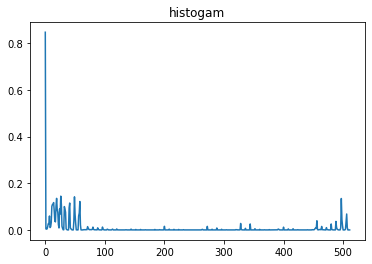

In [50]:
plt_imshow("histogam",data[5])

In [51]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)


In [53]:

# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/testing split...")
(trainData, testData, trainLabels, testLabels) = train_test_split(
	np.array(data), labels, test_size=0.25, random_state=42)

# train the linear regression clasifier
print("[INFO] training Linear SVM classifier...")
model = LinearSVC()
model.fit(trainData, trainLabels)

[INFO] constructing training/testing split...
[INFO] training Linear SVM classifier...


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [55]:
# evaluate the classifier
print("[INFO] evaluating classifier...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions,
	target_names=le.classes_))

[INFO] evaluating classifier...
              precision    recall  f1-score   support

         cat       0.62      0.68      0.65      3109
         dog       0.65      0.59      0.62      3141

    accuracy                           0.64      6250
   macro avg       0.64      0.64      0.63      6250
weighted avg       0.64      0.64      0.63      6250



## Type by Yourself